# Two-particle self consistency (TPSC)

Now, we use TPRF to study the *two-particle self consistent (TPSC)* approximation explained in [the lecture notes](https://www.physique.usherbrooke.ca/tremblay/cours/phy-892/N-corps.pdf) of André-Marie Tremblay and in the following [review](https://arxiv.org/abs/1107.1534) to study the Hubbard model on the square lattice with nearest neighbour hopping. 

In TPSC, the vertices for charge and spin fluctuations are different but are kept local. Just like the momentum and frequency independent bare interaction $U$ in the Hubbard model. Having separate vertices for spin ($U_{sp}$) and charge ($U_{ch}$) allows TPSC to obey density conservations laws and the Pauli principle.

## Theory

In TPCS the spin and charge susceptibilities $\chi_{sp}$ and $\chi_{ch}$ are defined as

$$ \chi_{sp}(\mathbf{q}, i\omega_n) \equiv \frac{\chi_0(\mathbf{q}, i\omega_n)}{1 - \frac{U_{sp}}{2} \chi_0(\mathbf{q}, i\omega_n)} \, ,$$

$$ \chi_{ch}(\mathbf{q}, i\omega_n) \equiv \frac{\chi_0(\mathbf{q}, i\omega_n)}{1 + \frac{U_{ch}}{2} \chi_0(\mathbf{q}, i\omega_n)} \, . $$

The verticies $U_{sp}$ and $U_{ch}$ are determined using two separate and cascaded sum rules. For the spin channel, $U_{sp}$ and $\chi_{sp}$ can be determined combining the definition of $\chi_{sp}$ above with the sum rule, 

$$
\chi_{sp}(\mathbf{r} = 0, \tau = \beta) =
\left< (n_\uparrow - n_\downarrow)^2\right>=n-2\left< n_\uparrow n_\downarrow\right> \, ,
$$

where the equal-time equal-position susceptibility alternatively can be expressed as the momentum and frequency sum

$$
\chi_{sp}(\mathbf{r} = 0, \tau = \beta) =
\frac{T}{N}\sum_{\mathbf{q},i\omega_n} \chi_{sp}(\mathbf{q}, i\omega_n)
\, .
$$

The Pauli principle requires that $\left< n_\uparrow^2\right>=\left< n_\uparrow\right>$ since only a single fermion can occupy a given state. Substituting the TPSC value of the spin susceptibility, the double occupancy $\left< n_\uparrow n_\downarrow\right>$ and $U_{sp}$ can be determined from

\begin{equation}
\frac{T}{N}\sum_{\mathbf{q},i\omega_n} \frac{\chi_0(\mathbf{q},i\omega_n)}{1-\frac{U_{sp}}{2}\chi_0(\mathbf{q},i\omega_n)}=n-2\left< n_\uparrow n_\downarrow\right>
\end{equation}

using the ansatz

\begin{equation}
U_{sp}\left<n_\uparrow\right> \left<n_\downarrow\right>=U\left<n_\uparrow n_\downarrow\right>.
\end{equation}

at fixed density $n \equiv \langle n_\uparrow \rangle + \langle n_\downarrow \rangle$.

With $U_{sp}$ known we now turn to $U_{ch}$ and determine it using a second conservation law and the Pauli principle for fermions. 

Given the double occupancy $\left<n_\uparrow n_\downarrow\right>=\frac{U_{sp}}{U} \left<n_\uparrow\right> \left<n_\downarrow\right>$, the charge vertex $U_{ch}$ can be obtained from

$$
\frac{T}{N}\sum_{\mathbf{q},i\omega_n} 
\frac{\chi_0(\mathbf{q},i\omega_n)}{1+\frac{U_{ch}} {2}\chi_0(\mathbf{q},i\omega_n)}=n+2\left< n_\uparrow n_\downarrow\right>-n^2.
$$

We will use a root finding algorithm in order to determine the value of $U_{sp}$ which makes $\chi_{sp}$ obey the first relation and then determined $U_{ch}$ so that $\chi_{ch}$ obeys the second conservation law.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from triqs.plot.mpl_interface import plt, oplot

import numpy as np
from triqs.gf import *

Load the bare susceptibility $\chi_0$ from the previous notebook

In [2]:
from h5 import HDFArchive

with HDFArchive("chi0_wk.h5", 'r') as R:
    chi0_wk = R['chi0_wk']

## Behaviour of $U_{sp}$ and $U_{ch}$ vs. $U$

Let's study the behaviour of $U_{sp}$ and $U_{ch}$ as we vary $U$. This will require us to solve the TPSC equations described above. Our aim is to reproduce the results from __[[Vilk and Tremblay, J. Phys. I France 7 (1997) 1309-1368]](https://jp1.journaldephysique.org/articles/jp1/abs/1997/11/jp1v7p1309/jp1v7p1309.html)__ __[[arXiv version]](https://arxiv.org/abs/cond-mat/9702188v3)__ and the figure:

<img src="./imgs/Fig2.png" alt="Drawing" style="width: 400px;"/>

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 1:

Define a function `solve_rpa(chi0_wk, U)` that
computes the following quantity:

\begin{equation}
  \chi_{RPA}[\chi_0, U] \equiv \frac{\chi_0(\mathbf{q}, i\omega_n)}
    {1 - \frac{U}{2} \chi_0(\mathbf{q}, i\omega_n)}
\end{equation}

This function will be useful to obtain both the spin and the charge
susceptibilities. Indeed we have that

\begin{equation}
 \chi_{sp} = \chi_{RPA}[\chi_0 ,U_{sp}]
 \qquad 
 \chi_{ch} = \chi_{RPA}[\chi_0,-U_{ch}]
\end{equation}

**Hint**: use the `triq_trpf.lattice.solve_rpa_PH` routine introduced in the previous notebook.

In [3]:
from triqs_tprf.lattice import solve_rpa_PH

def solve_rpa(chi0_wk, U):
    I = np.ones([1, 1, 1, 1], dtype=complex)
    chi_wk = solve_rpa_PH(chi0_wk, U/2 * I)
    return chi_wk

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 2:

We will now solve the TPSC equation for $U_{sp}$.

\begin{equation}
\frac{T}{N}\sum_{\mathbf{q},i\omega_n} \chi_{sp}(\mathbf{q},i\omega_n) = n-2\left< n_\uparrow n_\downarrow\right> = n - 2
\frac{U_{sp}}{U} \left<n_\uparrow\right> \left<n_\downarrow\right>
\, ,
\end{equation}

focusing on the unity density case $n=1$.

* Check analytically that this equation always has exactly one solution for $U_{sp}$.
* In what interval does $U_{sp}$ take its values?

In order to find the value of $U_{sp}$ that solves the equation we will use the scipy root solver `scipy.optimize.brentq`. Your task is to complete the code below by:

* defining the function `Usp_root` whose zero corresponds to the solution of the TPSC equation above.
* defining the interval $[a,b]$ where `brentq` has to look for zeroes

To our help we have the function `trace_chi` that computes the sum over momenta and Matsubara frequencies on the left hand side. 

Check that for $U=2$ the solution is given by $U_{sp} \simeq 1.51$.

In [4]:
def trace_chi(chi_wk):
    """Compute the sum, \sum_k \sum_\nu \chi(k,\nu)""" 
    wmesh, kmesh = chi_wk.mesh.components
    chi_w = Gf(mesh=wmesh, target_shape=[])
    chi_w.data[:] = np.sum(np.squeeze(chi_wk.data), axis=1) / len(kmesh)
    return -chi_w.density().real

def Usp_root(Usp, chi0_wk, n, U):
    
    # Write your code here
    
    tr_chi_sp = trace_chi(solve_rpa(chi0_wk, U=Usp))
    diff = tr_chi_sp + 0.5 * Usp/U * n**2 - n
    return diff

# Write your code here

U = 2.0
n = 1.0
a = 0
b = 2 / chi0_wk(0, [np.pi, np.pi, 0]).real

from scipy.optimize import brentq
Usp = brentq(Usp_root, a, b, args=(chi0_wk, n, U), xtol=1e-2)
print(Usp)

1.5092181189127931


### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 3:

With the solution for $U_{sp}$ known it is now possible to solve the TPSC equation for $U_{ch}$:

\begin{equation}
\frac{T}{N}\sum_{\mathbf{q},i\omega_n} \chi_{ch}(\mathbf{q},i\omega_n)
=n+2\left< n_\uparrow n_\downarrow\right>-n^2
= n+2 \frac{U_{sp}}{U} \left<n_\uparrow\right> \left<n_\downarrow\right>
- n^2
\end{equation}

For $U=2$, you should find $U_{ch} \simeq 3.59$.

In [5]:
def Uch_root(Uch, chi0_wk, n, U, docc):
    
    # write your code here
    
    tr_chi = trace_chi(solve_rpa(chi0_wk, U=-Uch))
    diff = tr_chi - 2 * docc - n + n**2
    return diff

docc = 0.25 * Usp / U * n**2
a = 0
b = 100
Uch = brentq(Uch_root, a, b, args=(chi0_wk, n, U, docc), xtol=1e-2)
print(Uch)

3.5918677213723913


### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 4:

Combining the calculators for $U_{sp}$ and $U_{ch}$ from above, we can now define a function `solve_tpsc(chi0_wk, U, n)` that solves the TPSC equations for a given value of $U$ and $n$ and returns $U_{sp}$ and $U_{ch}$.

Implement the function `solve_tpsc(chi0_wk, U, n)`

In [6]:
# Write your code here

def solve_tpsc(chi0_wk, U, n):
    Uc = 2/np.squeeze(chi0_wk(0, [np.pi, np.pi, 0])).real
    Usp = brentq(Usp_root, 0, Uc, args=(chi0_wk, n, U), xtol=1e-2)
    docc = 0.25 * Usp / U * n**2
    Uch = brentq(Uch_root, 0, 100, args=(chi0_wk, n, U, docc), xtol=1e-2)
    return Usp, Uch, docc, Uc

print(solve_tpsc(chi0_wk, 2., 1.))

(1.5092181189127931, 3.5918677213723913, 0.18865226486409914, 2.778901915273313)


### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 5:

Use the `solve_tpsc` function to study $U_{sp}$ and $U_{ch}$ as a function of $U$. Scan different values of $U$ between 0.3 and 5 and plot the result, comparing to the figure shown above. (There, the density is always $n=1$.)

In [7]:
# Write your code here

n = 1.0

# Initializes a table to store the results
U_vec = np.concatenate((np.arange(0.3, 1., 0.2), np.arange(1., 6., 1.)))    
Usp_vec, Uch_vec, docc_vec = [np.zeros_like(U_vec) for x in range(3)]

# Printing the header of the table
print(''.join('| %-11s' % s for s in ['n', 'U', 'Usp', 'Uch', 'docc']), '|')
print('-'*67)

# Loop over the different values of bare U
for idx, U in enumerate(U_vec):
    Usp, Uch, docc, Uc = solve_tpsc(chi0_wk, U, n)
    Usp_vec[idx], Uch_vec[idx], docc_vec[idx] = Usp, Uch, docc
    print(''.join('| %4.4E ' % x for x in [n, U, Usp, Uch, docc]), '|')

| n          | U          | Usp        | Uch        | docc        |
-------------------------------------------------------------------
| 1.0000E+00 | 3.0000E-01 | 2.8960E-01 | 3.2410E-01 | 2.4133E-01  |
| 1.0000E+00 | 5.0000E-01 | 4.6960E-01 | 6.0074E-01 | 2.3480E-01  |
| 1.0000E+00 | 7.0000E-01 | 6.4299E-01 | 8.4181E-01 | 2.2964E-01  |
| 1.0000E+00 | 9.0000E-01 | 8.0435E-01 | 1.1509E+00 | 2.2343E-01  |
| 1.0000E+00 | 1.0000E+00 | 8.8118E-01 | 1.3194E+00 | 2.2029E-01  |
| 1.0000E+00 | 2.0000E+00 | 1.5092E+00 | 3.5919E+00 | 1.8865E-01  |
| 1.0000E+00 | 3.0000E+00 | 1.9155E+00 | 7.1248E+00 | 1.5962E-01  |
| 1.0000E+00 | 4.0000E+00 | 2.1660E+00 | 1.2127E+01 | 1.3538E-01  |
| 1.0000E+00 | 5.0000E+00 | 2.3187E+00 | 1.8718E+01 | 1.1594E-01  |


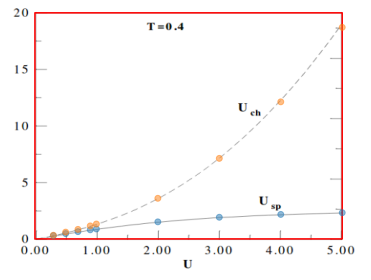

In [8]:
from matplotlib.image import imread

# Some manual adjustements here to overlay the original figure. May change from one
# machine to another
im = imread("imgs/Fig2.png")
plt.imshow(im, extent=(-0.45, 5.35, -3, 20.5), aspect='auto')
plt.plot([0,5,5,0,0],[0,0,20,20,0],'-r')

plt.plot(U_vec, Usp_vec, 'o', label=r'$U_{sp}$', alpha=0.5, lw=2)
plt.plot(U_vec, Uch_vec, 'o', label=r'$U_{ch}$', alpha=0.5, lw=2)

plt.axis('off');

### Note: weakness of RPA

Given the above sum rules, note that in TPSC the following sum-rule, a consequence of the Pauli principle, is satisfied:

\begin{equation}
2\frac{T}{N}\sum_{\mathbf{q},iq_n} \left (\frac{\chi_0(\mathbf{q},iq_n)}{1-\frac{U_{sp}}{2}\chi_0(\mathbf{q},iq_n)}+\frac{\chi_0(\mathbf{q},iq_n)}{1+\frac{U_{ch}}{2}\chi_0(\mathbf{q},iq_n)}\right)=2n-n^2.
\end{equation}

Note that the right-hand side is independent of interactions.

In RPA the left hand side of the above equation takes the form

\begin{equation}
\frac{T}{N}\sum_{\mathbf{q},iq_n} \left (\frac{\chi_0(\mathbf{q},iq_n)}{1-\frac{U}{2}\chi_0(\mathbf{q},iq_n)}+\frac{\chi_0(\mathbf{q},iq_n)}{1+\frac{U}{2}\chi_0(\mathbf{q},iq_n)}\right)
\end{equation}

Note that the bare $U$ enters in both denominators. 

Study the violation of this sum rule by RPA by plotting the RPA expression as a function of $U$.

In [9]:
# Write your code here

n = 1.0
U_vec = np.arange(0., 2.5, 0.25)
sum_chi_vec = np.zeros_like(U_vec)

wmesh, kmesh = chi0_wk.mesh.components

print(''.join('| %-11s' % s for s in ['U', 'sum_chi', '2n-n*n']), '|')
print('-'*41)

for idx, U in enumerate(U_vec):
    sum_chi = solve_rpa(chi0_wk, +0.5*U) + solve_rpa(chi0_wk, -0.5*U)
    sum_chi = trace_chi(sum_chi)
    sum_chi_vec[idx] = sum_chi.real
    print(''.join('| %4.4E ' % x for x in [U, sum_chi.real, 2*n-n**2]), '|')

| U          | sum_chi    | 2n-n*n      |
-----------------------------------------
| 0.0000E+00 | 9.9935E-01 | 1.0000E+00  |
| 2.5000E-01 | 9.9969E-01 | 1.0000E+00  |
| 5.0000E-01 | 1.0007E+00 | 1.0000E+00  |
| 7.5000E-01 | 1.0024E+00 | 1.0000E+00  |
| 1.0000E+00 | 1.0048E+00 | 1.0000E+00  |
| 1.2500E+00 | 1.0079E+00 | 1.0000E+00  |
| 1.5000E+00 | 1.0118E+00 | 1.0000E+00  |
| 1.7500E+00 | 1.0166E+00 | 1.0000E+00  |
| 2.0000E+00 | 1.0222E+00 | 1.0000E+00  |
| 2.2500E+00 | 1.0287E+00 | 1.0000E+00  |


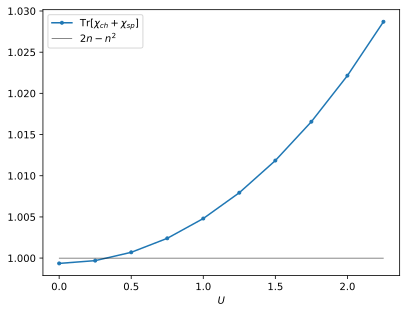

In [10]:
plt.plot(U_vec, sum_chi_vec, '.-', label=r'Tr[$\chi_{ch} + \chi_{sp}$]')
plt.plot(U_vec, 0*U_vec + 2*n - n**2, 'k-', lw=0.5, label=r'$2n-n^2$')
plt.xlabel(r'$U$')
plt.legend();